# Handling Mixed Variables

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [3]:
df.number.unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passengers travelling with')

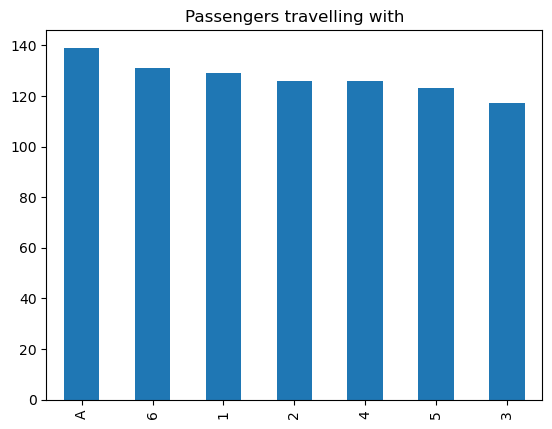

In [4]:
fig = df.number.value_counts().plot.bar()
fig.set_title('Passengers travelling with')

In [5]:
# Downcast the column to the smallest possible integer dtype
df['number_numerical'] = pd.to_numeric(df['number'], errors='coerce', downcast='integer')

# Extract the categorical part
df['number_categorical'] = np.where(df['number_numerical'].isnull(), df['number'], np.nan)



In [6]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [7]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [8]:
df.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [9]:
df['cabin_number'] = df['Cabin'].str.extract('(\d+)')  # captures numerical part
df['cabin_categories'] = df['Cabin'].str[0]  # captures the first letter

df.head()


,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_number,cabin_categories
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


<Axes: >

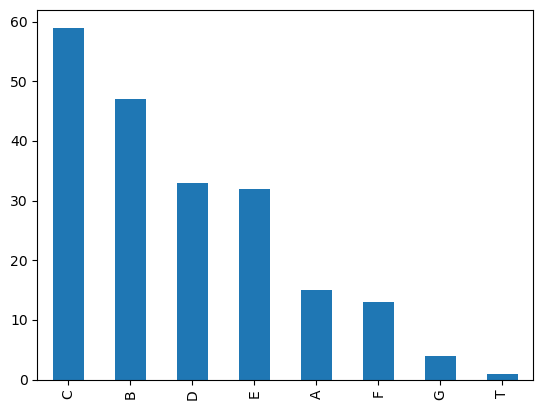

In [10]:
df.cabin_categories.value_counts().plot(kind='bar')

In [11]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])


In [12]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_number,cabin_categories,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN


In [13]:
df.drop(columns=['Cabin','Ticket','number'], inplace=True, axis=1)
df.head()

,Survived,number_numerical,number_categorical,cabin_number,cabin_categories,ticket_num,ticket_cat
0,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,1,3.0,NaN,85,C,17599.0,PC
2,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,1,3.0,NaN,123,C,113803.0,NaN
4,0,NaN,A,NaN,NaN,373450.0,NaN


# Handling Time and Date

# Dates

In [14]:
date = pd.read_csv('orders.csv')


In [15]:
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [16]:
date['date'] = pd.to_datetime(date['date'])

In [17]:
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


# Exract year

In [18]:
date['date_year'] =  date['date'].dt.year

In [19]:
date.sample(5)

,date,product_id,city_id,orders,date_year
119,2019-08-15,650,25,2,2019
72,2018-08-27,7582,17,30,2018
88,2019-10-11,925,25,10,2019
303,2019-06-01,1069,27,7,2019
813,2019-06-12,12,25,1,2019


# Extract months

In [20]:
date['date_months'] =  date['date'].dt.month

In [21]:
date.sample(5)

,date,product_id,city_id,orders,date_year,date_months
788,2018-11-03,3635,16,46,2018,11
300,2019-05-31,2981,26,1004,2019,5
722,2019-10-16,498,0,1,2019,10
992,2019-11-01,4146,9,1,2019,11
292,2018-09-02,1455,0,1,2018,9


In [22]:
date['date_month_name'] = date['date'].dt.month_name()

date.head()

,date,product_id,city_id,orders,date_year,date_months,date_month_name
0,2019-12-10,5628,25,3,2019,12,December
1,2018-08-15,3646,14,157,2018,8,August
2,2018-10-23,1859,25,1,2018,10,October
3,2019-08-17,7292,25,1,2019,8,August
4,2019-01-06,4344,25,3,2019,1,January


# Extract Days

In [23]:
date['date_day'] = date['date'].dt.day

date.head()

,date,product_id,city_id,orders,date_year,date_months,date_month_name,date_day
0,2019-12-10,5628,25,3,2019,12,December,10
1,2018-08-15,3646,14,157,2018,8,August,15
2,2018-10-23,1859,25,1,2018,10,October,23
3,2019-08-17,7292,25,1,2019,8,August,17
4,2019-01-06,4344,25,3,2019,1,January,6


In [24]:
# day of week
date['date_dow'] = date['date'].dt.dayofweek

date.head()

,date,product_id,city_id,orders,date_year,date_months,date_month_name,date_day,date_dow
0,2019-12-10,5628,25,3,2019,12,December,10,1
1,2018-08-15,3646,14,157,2018,8,August,15,2
2,2018-10-23,1859,25,1,2018,10,October,23,1
3,2019-08-17,7292,25,1,2019,8,August,17,5
4,2019-01-06,4344,25,3,2019,1,January,6,6


In [25]:
# day of week - name

date['date_dow_name'] = date['date'].dt.day_name()

date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_months,date_month_name,date_day,date_dow,date_dow_name
0,2019-12-10,2019,12,December,10,1,Tuesday
1,2018-08-15,2018,8,August,15,2,Wednesday
2,2018-10-23,2018,10,October,23,1,Tuesday
3,2019-08-17,2019,8,August,17,5,Saturday
4,2019-01-06,2019,1,January,6,6,Sunday


In [26]:
# is weekend?

date['date_is_weekend'] = np.where(date['date_dow_name'].isin(['Sunday', 'Saturday']), 1,0)

date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_months,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend
0,2019-12-10,2019,12,December,10,1,Tuesday,0
1,2018-08-15,2018,8,August,15,2,Wednesday,0
2,2018-10-23,2018,10,October,23,1,Tuesday,0
3,2019-08-17,2019,8,August,17,5,Saturday,1
4,2019-01-06,2019,1,January,6,6,Sunday,1


In [27]:
date['date_week'] = date['date'].dt.week

date.drop(columns=['product_id','city_id','orders']).head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_16272\1798805728.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  date['date_week'] = date['date'].dt.week


,date,date_year,date_months,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend,date_week
0,2019-12-10,2019,12,December,10,1,Tuesday,0,50
1,2018-08-15,2018,8,August,15,2,Wednesday,0,33
2,2018-10-23,2018,10,October,23,1,Tuesday,0,43
3,2019-08-17,2019,8,August,17,5,Saturday,1,33
4,2019-01-06,2019,1,January,6,6,Sunday,1,1


# Extract Quarter

In [28]:
date['quarter'] = date['date'].dt.quarter

date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_months,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend,date_week,quarter
0,2019-12-10,2019,12,December,10,1,Tuesday,0,50,4
1,2018-08-15,2018,8,August,15,2,Wednesday,0,33,3
2,2018-10-23,2018,10,October,23,1,Tuesday,0,43,4
3,2019-08-17,2019,8,August,17,5,Saturday,1,33,3
4,2019-01-06,2019,1,January,6,6,Sunday,1,1,1


# Extract Semester

In [29]:
date['semester'] = np.where(date['quarter'].isin([1,2]), 1, 2)

date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_months,date_month_name,date_day,date_dow,date_dow_name,date_is_weekend,date_week,quarter,semester
0,2019-12-10,2019,12,December,10,1,Tuesday,0,50,4,2
1,2018-08-15,2018,8,August,15,2,Wednesday,0,33,3,2
2,2018-10-23,2018,10,October,23,1,Tuesday,0,43,4,2
3,2019-08-17,2019,8,August,17,5,Saturday,1,33,3,2
4,2019-01-06,2019,1,January,6,6,Sunday,1,1,1,1


# Extract Time elapsed between dates

In [30]:
import datetime

today = datetime.datetime.today()

today

datetime.datetime(2023, 11, 12, 11, 59, 26, 447822)

In [31]:
today - date['date']

0     1433 days 11:59:26.447822
1     1915 days 11:59:26.447822
2     1846 days 11:59:26.447822
3     1548 days 11:59:26.447822
4     1771 days 11:59:26.447822
                 ...           
995   1861 days 11:59:26.447822
996   1802 days 11:59:26.447822
997   1650 days 11:59:26.447822
998   1715 days 11:59:26.447822
999   1489 days 11:59:26.447822
Name: date, Length: 1000, dtype: timedelta64[ns]

In [32]:
(today - date['date']).dt.days

0      1433
1      1915
2      1846
3      1548
4      1771
       ... 
995    1861
996    1802
997    1650
998    1715
999    1489
Name: date, Length: 1000, dtype: int64

In [33]:
# Months passed

np.round((today -date['date']) / np.timedelta64(1, 'M'),0)

0      47.0
1      63.0
2      61.0
3      51.0
4      58.0
       ... 
995    61.0
996    59.0
997    54.0
998    56.0
999    49.0
Name: date, Length: 1000, dtype: float64

# Working with Time

# 

In [34]:
time = pd.read_csv('messages.csv')
time.head()

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


In [35]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [36]:
# Converting to datetime datatype
time['date'] = pd.to_datetime(time['date'])

In [37]:
time.sample(5)

,date,msg
144,2013-06-10 00:40:00,Карина сделает М до 40 звони
290,2013-07-24 01:23:00,м50позн.своб.строй.д.ж.от43для встреч днепр 09...
211,2013-02-24 01:46:00,парни звоните девочка скучает
405,2012-01-16 00:23:00,М Муж.38.186.стройн. Ищу Симп.ухоженную Женщ....
862,2016-11-18 22:53:00,муж 45 днепр с дев для общ смс 066 625 21 85


In [38]:
time['hour'] = time['date'].dt.hour
time['min'] = time['date'].dt.minute
time['sec'] = time['date'].dt.second

time.head()

,date,msg,hour,min,sec
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0


# Extract Time part

In [39]:
time['time'] = time['date'].dt.time

time.head()

,date,msg,hour,min,sec,time
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0,00:50:00
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0,23:40:00
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0,00:21:00
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0,00:31:00
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0,23:11:00


# Time difference

In [40]:
today - time['date']

0     3619 days 11:09:26.447822
1     3483 days 12:19:26.447822
2     3969 days 11:38:26.447822
3     3271 days 11:28:26.447822
4     3668 days 12:48:26.447822
                 ...           
995   4258 days 11:09:26.447822
996   3579 days 12:45:26.447822
997   4044 days 12:22:26.447822
998   4160 days 12:25:26.447822
999   3432 days 12:34:26.447822
Name: date, Length: 1000, dtype: timedelta64[ns]

In [41]:
# in seconds

(today - time['date'])/np.timedelta64(1,'s')

0      3.127218e+08
1      3.009756e+08
2      3.429635e+08
3      2.826557e+08
4      3.169613e+08
           ...     
995    3.679314e+08
996    3.092715e+08
997    3.494461e+08
998    3.594687e+08
999    2.965701e+08
Name: date, Length: 1000, dtype: float64

In [42]:
# in minutes

(today - time['date'])/np.timedelta64(1,'m')

0      5.212029e+06
1      5.016259e+06
2      5.716058e+06
3      4.710928e+06
4      5.282688e+06
           ...     
995    6.132189e+06
996    5.154525e+06
997    5.824102e+06
998    5.991145e+06
999    4.942834e+06
Name: date, Length: 1000, dtype: float64

In [43]:
# in hours

(today - time['date'])/np.timedelta64(1,'h')

0       86867.157347
1       83604.324013
2       95267.640680
3       78515.474013
4       88044.807347
           ...      
995    102203.157347
996     85908.757347
997     97068.374013
998     99852.424013
999     82380.574013
Name: date, Length: 1000, dtype: float64

# Complete Case Analysis(CCA-35)

In [44]:
df = pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [45]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [46]:
# those columns missing values under 5% or below then normally we applied mean/median/dropna method

In [47]:
df.shape

(19158, 13)

In [48]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [49]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
18576,0.836,NaN,High School,9.0,36.0
6310,0.920,no_enrollment,Phd,20.0,48.0
10416,0.920,Part time course,Graduate,3.0,107.0
4707,0.920,no_enrollment,Graduate,15.0,15.0
5667,0.910,no_enrollment,Graduate,4.0,36.0


In [50]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [51]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [52]:
new_df = df[cols].dropna()
new_df.shape

(17182, 5)

In [53]:
df.shape

(19158, 13)

In [54]:
import matplotlib.pyplot as plt

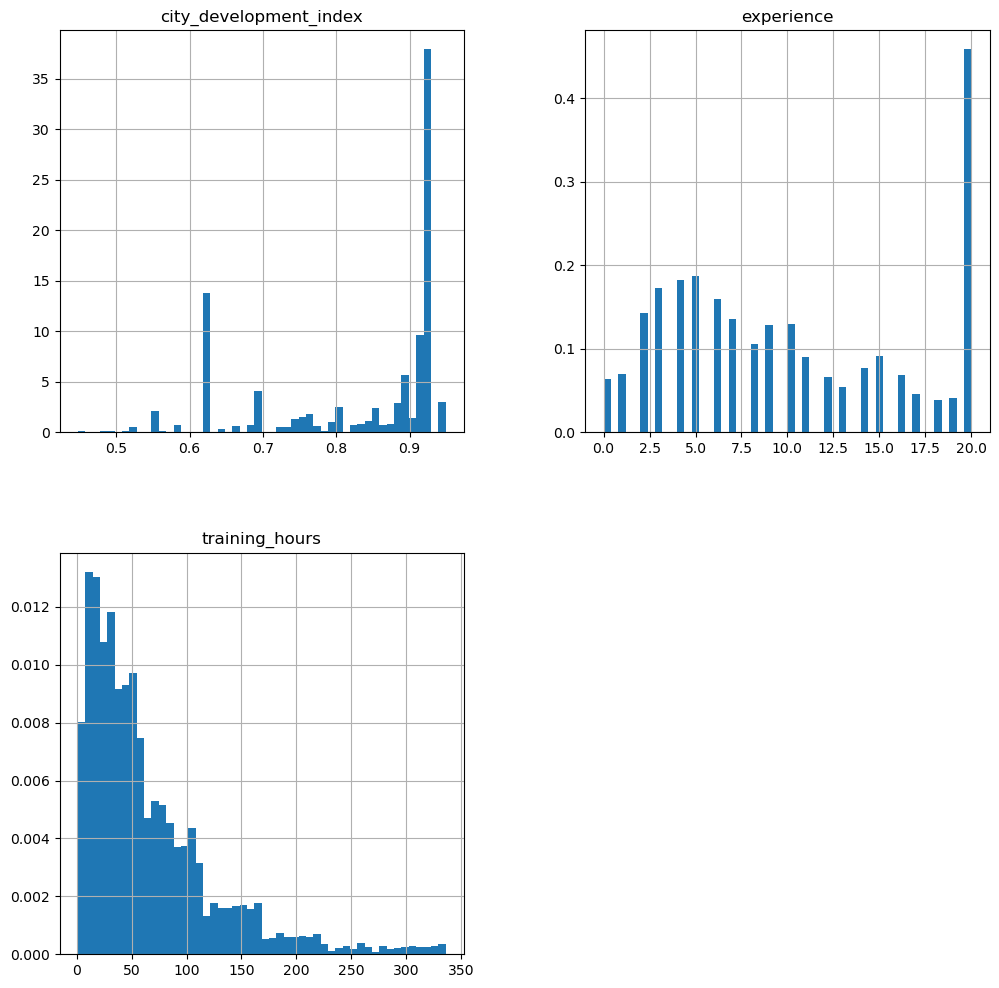

In [55]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

<Axes: >

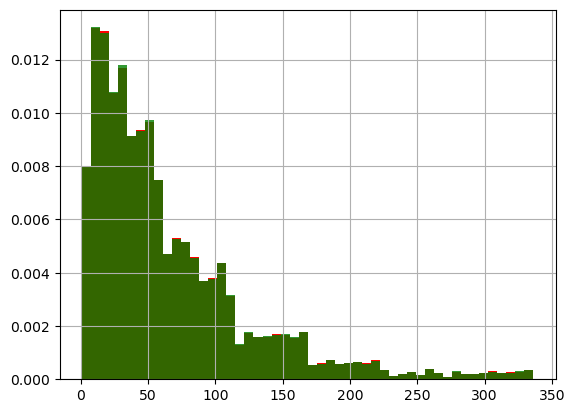

In [56]:

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

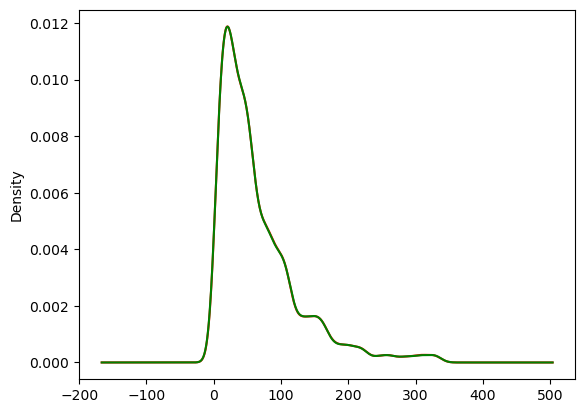

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<Axes: >

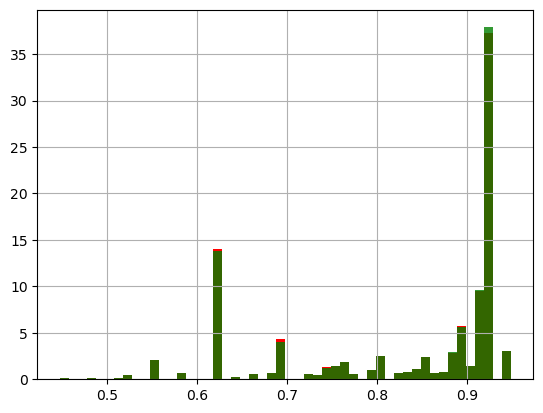

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

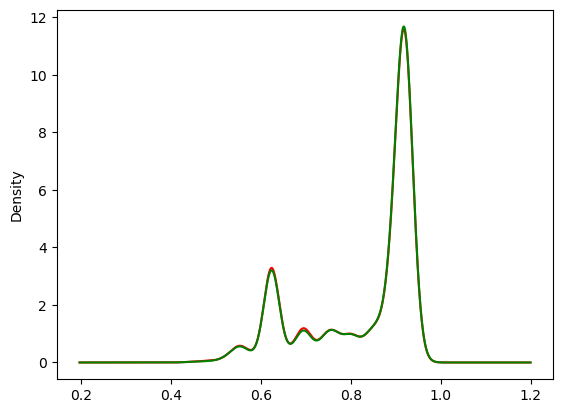

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

<Axes: >

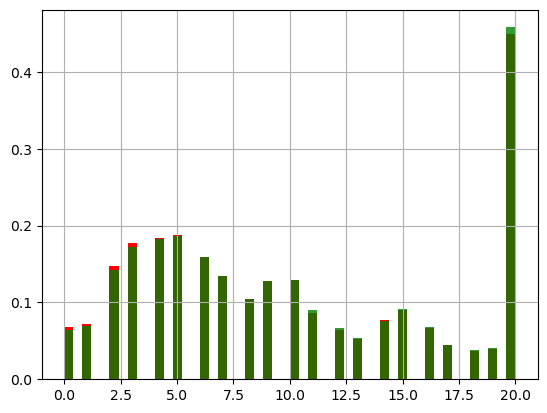

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

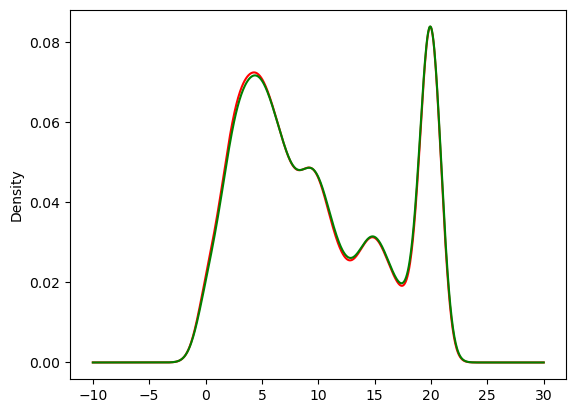

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

In [62]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [63]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


# Mean-Median Imputation (36)

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [65]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [67]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [68]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [69]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=.30, random_state=42)

In [70]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((623, 3), (268, 3), (623,), (268,))

In [71]:
xtrain.isnull().mean()

Age       0.199037
Fare      0.048154
Family    0.000000
dtype: float64

In [72]:
mean_age = xtrain.Age.mean()
median_age = xtrain.Age.median()

mean_fare = xtrain.Fare.mean()
median_fare = xtrain.Fare.median()

In [73]:
xtrain['Age_median'] = xtrain['Age'].fillna(median_age)
xtrain['Age_mean'] = xtrain['Age'].fillna(mean_age)

xtrain['Fare_median'] = xtrain['Fare'].fillna(median_fare)
xtrain['Fare_mean'] = xtrain['Fare'].fillna(mean_fare)

In [74]:
xtrain.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
555,62.0,26.55,0,62.0,62.000000,26.55,26.55
191,19.0,13.00,0,19.0,19.000000,13.00,13.00
152,55.5,8.05,0,55.5,55.500000,8.05,8.05
334,NaN,133.65,1,28.0,29.256353,133.65,133.65
419,10.0,24.15,2,10.0,10.000000,24.15,24.15


In [75]:

print('Original Age variable variance: ', xtrain['Age'].var())
print('Age Variance after median imputation: ', xtrain['Age_median'].var())
print('Age Variance after mean imputation: ', xtrain['Age_mean'].var())

print('Original Fare variable variance: ', xtrain['Fare'].var())
print('Fare Variance after median imputation: ', xtrain['Fare_median'].var())
print('Fare Variance after mean imputation: ', xtrain['Fare_mean'].var())

Original Age variable variance:  211.95188064643307
Age Variance after median imputation:  169.94984651902135
Age Variance after mean imputation:  169.69780797736954
Original Fare variable variance:  2666.9296723129796
Fare Variance after median imputation:  2552.1099348908224
Fare Variance after mean imputation:  2538.2996238091378


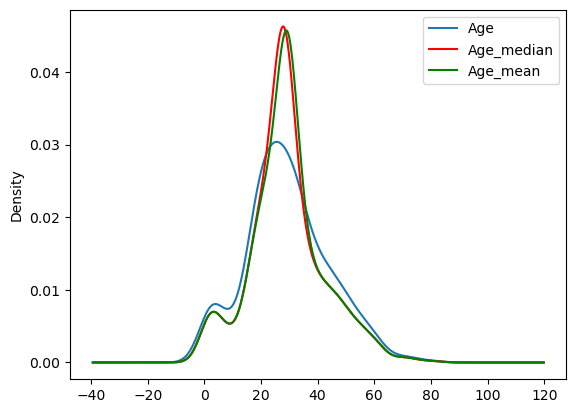

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
xtrain['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
xtrain['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
xtrain['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

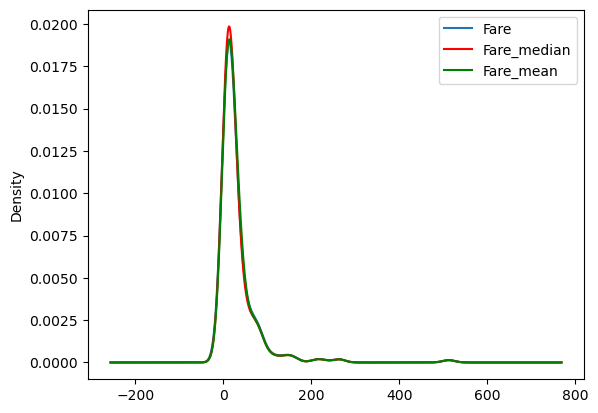

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
xtrain['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
xtrain['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
xtrain['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [78]:
xtrain.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,211.951881,71.822073,-6.932603,211.951881,211.951881,65.775061,67.757268
Fare,71.822073,2666.929672,18.612474,59.765747,56.998513,2666.929672,2666.929672
Family,-6.932603,18.612474,2.997027,-5.533529,-5.550541,17.767537,17.714766
Age_median,211.951881,59.765747,-5.533529,169.949847,169.697808,55.227061,56.883154
Age_mean,211.951881,56.998513,-5.550541,169.697808,169.697808,52.662348,54.249388
Fare_median,65.775061,2666.929672,17.767537,55.227061,52.662348,2552.109935,2538.299624
Fare_mean,67.757268,2666.929672,17.714766,56.883154,54.249388,2538.299624,2538.299624


In [79]:
xtrain.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.088197,-0.310167,1.000000,1.000000,0.083017,0.085804
Fare,0.088197,1.000000,0.205140,0.088616,0.084564,1.000000,1.000000
Family,-0.310167,0.205140,1.000000,-0.245186,-0.246123,0.203157,0.203104
Age_median,1.000000,0.088616,-0.245186,1.000000,0.999258,0.083857,0.086607
Age_mean,1.000000,0.084564,-0.246123,0.999258,1.000000,0.080023,0.082658
Fare_median,0.083017,1.000000,0.203157,0.083857,0.080023,1.000000,0.997291
Fare_mean,0.085804,1.000000,0.203104,0.086607,0.082658,0.997291,1.000000


<Axes: >

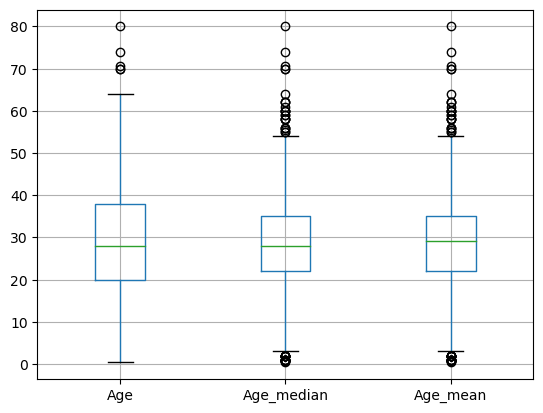

In [80]:
xtrain[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

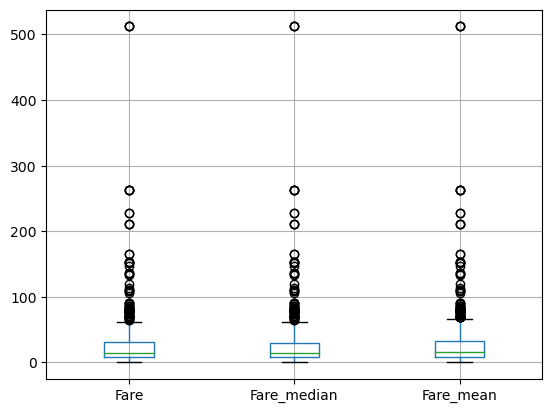

In [81]:
xtrain[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

# Using sklearn

In [82]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=42)

In [83]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [84]:
trf = ColumnTransformer([
    ('imputer1', imputer1,['Fare']),
    ('imputer2', imputer2,['Age'])
], remainder='passthrough')

In [85]:
trf.fit(xtrain)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(), ['Fare']),
                                ('imputer2', SimpleImputer(strategy='median'),
                                 ['Age'])])

In [86]:
trf.named_transformers_['imputer1'].statistics_

array([31.79834806])

In [87]:
trf.named_transformers_['imputer2'].statistics_

array([28.])

In [88]:
X_test = trf.transform(xtest)
X_test

array([[ 15.2458    ,  28.        ,   2.        ],
       [ 10.5       ,  31.        ,   0.        ],
       [  7.925     ,  20.        ,   0.        ],
       [ 33.        ,   6.        ,   1.        ],
       [ 11.2417    ,  14.        ,   1.        ],
       [ 78.85      ,  26.        ,   0.        ],
       [  7.75      ,  28.        ,   0.        ],
       [ 18.        ,  16.        ,   2.        ],
       [  7.75      ,  16.        ,   0.        ],
       [ 26.2833    ,  19.        ,   2.        ],
       [ 53.1       ,  37.        ,   1.        ],
       [  8.05      ,  44.        ,   0.        ],
       [ 25.4667    ,  28.        ,   4.        ],
       [  7.225     ,  30.        ,   0.        ],
       [ 13.        ,  36.        ,   0.        ],
       [ 39.4       ,  16.        ,   1.        ],
       [ 52.5542    ,  42.        ,   1.        ],
       [  7.8292    ,  28.        ,   0.        ],
       [ 13.        ,  27.        ,   0.        ],
       [ 52.        ,  47.     

# Categorical Data(37)

In [89]:
df = pd.read_csv('train.csv', usecols=['GarageQual','FireplaceQu','SalePrice'])

In [90]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [91]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

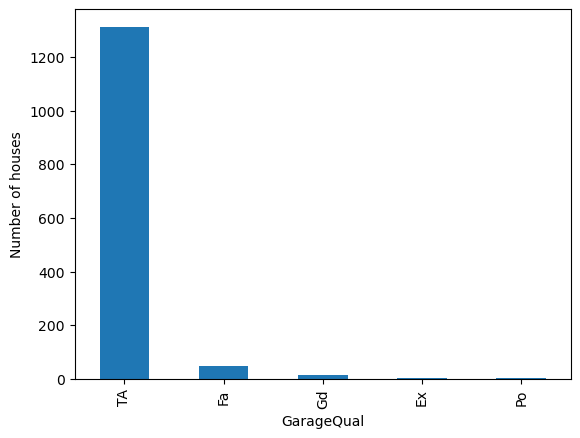

In [92]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [93]:
df['GarageQual'].fillna('Missing', inplace=True)

Text(0, 0.5, 'Number of houses')

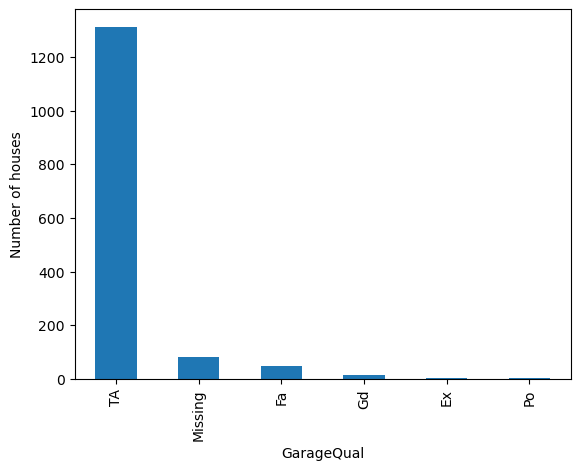

In [94]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [95]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [96]:
imputer = SimpleImputer(strategy='constant',fill_value='Missing')

In [97]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_train)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [98]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)

# automatically-select-imputer-parameters(38)

# 

In [99]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [100]:
df = pd.read_csv('titanic-train.csv')

In [101]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
df.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [103]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [105]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
451,3,male,NaN,1,0,19.9667,S
345,2,female,24.0,0,0,13.0000,S
687,3,male,19.0,0,0,10.1708,S
279,3,female,35.0,1,1,20.2500,S
742,1,female,21.0,2,2,262.3750,C


In [106]:
numerical_features = ['Age', 'Fare']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Embarked', 'Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [107]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [108]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [109]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

In [110]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10)

In [111]:
grid_search.fit(X_train, y_train)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'classifier__C': 1.0, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}


In [112]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 0.790


In [113]:
import pandas as pd

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values("mean_test_score", ascending=False)
cv_results[['param_classifier__C','param_preprocessor__cat__imputer__strategy','param_preprocessor__num__imputer__strategy','mean_test_score']]


,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score
4,1.0,most_frequent,mean,0.789631
5,1.0,most_frequent,median,0.789631
6,1.0,constant,mean,0.789631
7,1.0,constant,median,0.789631
8,10,most_frequent,mean,0.789631
9,10,most_frequent,median,0.789631
10,10,constant,mean,0.789631
11,10,constant,median,0.789631
12,100,most_frequent,mean,0.789631
13,100,most_frequent,median,0.789631
